__Goal__ 

Test:
- MC e-soft normal reward
- MC e-soft custom reward
- SARSA 
- 6-step SARSA
- exp-SARSA
- Q-Learning

10,000 episodes, average of 10 trials

In [1]:
from discretize import discretize
from collections import defaultdict
from monte_carlo import *
from q_io import *
from tqdm import trange
from td_methods import *
import gymnasium as gym
from plots import *

In [2]:
epsilon = 0.04
num_episodes = 10_000
gamma = 0.95
num_to_avg = 10
step_size = 0.5
env = gym.make('CartPole-v1')
seed = 123

In [3]:
# Monte Carlo Plain
mc_ep_lengths_plain = []

# np.random.seed(seed)
# env.reset(seed=seed)
# for i in range(num_to_avg):
#     Q, policy, _, ep_lengths = on_policy_mc_control_plain(env=env, num_episodes=num_episodes, gamma=gamma)
#     mc_e_soft_ep_lengths_plain.append(ep_lengths)
#     save_array(ep_lengths, f'mc_comparison_only/mc_plain_ep_lengths_16000_{i}.txt')

# 10,000 episodes - 10 runs - epsilon = 0.04 - gamma = 0.95 - step_size = 0.5
for i in range(num_to_avg):
    array = load_array(f'mc_comparison_only/mc_plain_ep_lengths_16000_{i}.txt')
    mc_ep_lengths_plain.append(array)


In [4]:
# Monte Carlo Optimistic Initializaiton
mc_optimistic_ep_lengths = []

# np.random.seed(seed)
# env.reset(seed=seed)
# for i in range(num_to_avg):
#     Q, policy, _, ep_lengths = on_policy_mc_control_optimistic_initialization(env=env, num_episodes=num_episodes, gamma=gamma)
#     mc_optimistic_ep_lengths.append(ep_lengths)
#     save_array(ep_lengths, f'mc_comparison_only/mc_optimistic_ep_lengths_16000_{i}.txt')

# 10,000 episodes - 10 runs - epsilon = 0.04 - gamma = 0.95 - step_size = 0.5
for i in range(num_to_avg):
    array = load_array(f'mc_comparison_only/mc_optimistic_ep_lengths_16000_{i}.txt')
    mc_optimistic_ep_lengths.append(array)


In [10]:
# Monte Carlo Default Reward
mc_e_soft_ep_lengths_default = []

np.random.seed(seed)
env.reset(seed=seed)
for i in range(num_to_avg):
    Q, policy, _, ep_lengths = on_policy_mc_control_epsilon_soft(env=env, epsilon=epsilon, num_episodes=num_episodes, gamma=gamma)
    mc_e_soft_ep_lengths_default.append(ep_lengths)
#     save_array(ep_lengths, f'mc_comparison_only/mc_epsilon_default_ep_lengths_16000_{i}.txt')

# 10,000 episodes - 10 runs - epsilon = 0.04 - gamma = 0.95 - step_size = 0.5
for i in range(num_to_avg):
    array = load_array(f'comparison/mc_default_ep_lengths_16000_{i}.txt')
    mc_e_soft_ep_lengths_default.append(array)


In [14]:
# Monte Carlo Custom Reward
mc_e_soft_ep_lengths_custom = []

np.random.seed(seed)
env.reset(seed=seed)
for i in range(num_to_avg):
    Q, policy, _, ep_lengths = on_policy_mc_control_epsilon_soft(env=env, epsilon=epsilon, num_episodes=num_episodes, gamma=gamma, episode_generator_func=generate_episode_reward_central_vertical)
    mc_e_soft_ep_lengths_custom.append(ep_lengths)
    break
#     save_array(ep_lengths, f'mc_comparison_only/mc_epsilon_custom_ep_lengths_16000_{i}.txt')

# for i in range(num_to_avg):
#     array = load_array(f'comparison/mc_custom_ep_lengths_16000_{i}.txt')
#     mc_e_soft_ep_lengths_custom.append(array)

In [58]:
Q, policy, _, ep_lengths = on_policy_mc_control_epsilon_soft(env=env, epsilon=epsilon, num_episodes=16000, gamma=gamma, episode_generator_func=generate_episode_reward_central_vertical)


In [107]:
import imageio
import os

env = gym.make('CartPole-v1', render_mode='rgb_array')
def make_gif(env, policy, gif_name='mc_epsilon_custom.gif'):
    all_frames = []

    state = discretize(env.reset())[0]
    
    while True:
        all_frames.append(env.render())


        action = policy(state)

        state, _, done, _, _ = discretize(env.step(action))
                
        if done:
            break

    env.close()
    
    imageio.mimwrite(os.path.join('./videos/', gif_name), all_frames, loop=0, duration=1000/30)

    return len(all_frames)


In [109]:
make_gif(env, policy)

235

In [88]:
# for i in range(100):
#     if make_gif(env, policy, gif_name=f'mc-custom-agent-{i}.gif') > 100:
#         print(i)

TypeError: '>' not supported between instances of 'NoneType' and 'int'

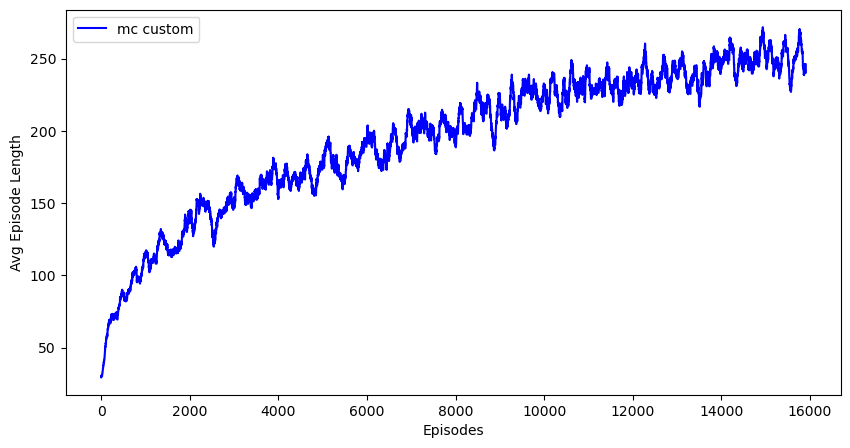

In [61]:
plot_episode_lengths([[ep_lengths]], ["mc custom"], smoothing=100, width=10, height=5)


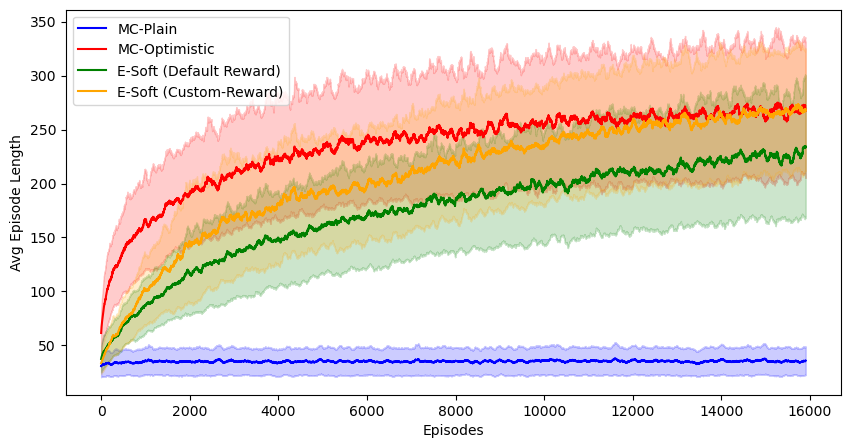

In [9]:
# plot_episode_lengths([mc_ep_lengths_plain, mc_optimistic_ep_lengths, mc_e_soft_ep_lengths_default, mc_e_soft_ep_lengths_custom], ["MC-Plain", "MC-Optimistic", "E-Soft (Default Reward)", "E-Soft (Custom-Reward)"], smoothing=100, width=10, height=5)
# plot_episode_lengths([mc_e_soft_ep_lengths_default, n_step_sarsa_ep_lengths], ['MC', '100-Step SARSA'], smoothing=100, error_range=True)
# plot_episode_lengths([mc_e_soft_ep_lengths_default, mc_e_soft_ep_lengths_custom], ['MC Epsilon Soft', 'MC Epsilon Soft Custom'], smoothing=100, error_range=True)
# plot_episode_lengths([sarsa_ep_lengths, n_step_sarsa_ep_lengths, exp_sarsa_ep_lengths, q_learning_ep_lengths], ['SARSA', '6-step SARSA', 'Expected SARSA', 'Q-Learning'], smoothing=100, error_range=True)
# plot_episode_lengths([mc_e_soft_ep_lengths_default, mc_e_soft_ep_lengths_custom, sarsa_ep_lengths, n_step_sarsa_ep_lengths, exp_sarsa_ep_lengths, q_learning_ep_lengths], ['MC Epsilon Soft', 'MC Epsilon Soft Custom', 'SARSA', '6-step SARSA', 'Expected SARSA', 'Q-Learning'], smoothing=100, error_range=False)

In [8]:
# run_iterations(env=gym.make('CartPole-v1', render_mode='human'), Q=Q, n=5)